***#Clustering in Machine Learning***
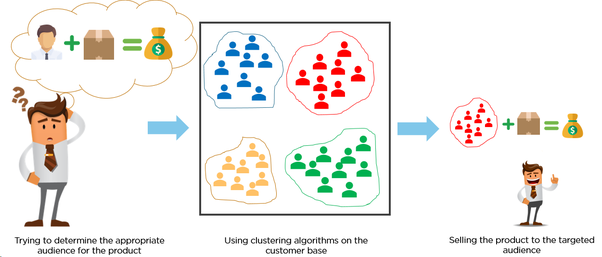

#What is Clustering ?

In [ ]:
#Clustering is the task of dividing the population or data points into a number of groups 
#such that data points in the same groups are more similar to other data points in the same group 
#than those in other groups. In simple words, the aim is to segregate groups 
#with similar traits and assign them into clusters.

# What are types of Clustering ?

In [ ]:

    #Hard Clustering: In hard clustering, each data point either belongs to a cluster completely or not. 

    #Soft Clustering: In soft clustering, instead of putting each data point into a separate cluster, 
    #a probability or likelihood of that data point to be in those clusters is assigned. 


#What are different types of Clustering Algorithms



1.   Connectivity Models
2.   Centroid Models
3.   Distribution Models
4.   Density Models



#Applications of Clustering


    Recommendation engines
    Market segmentation
    Social network analysis
    Search result grouping
    Medical imaging
    Image segmentation
    Anomaly detection


#Kmeans Clustering Algorithm

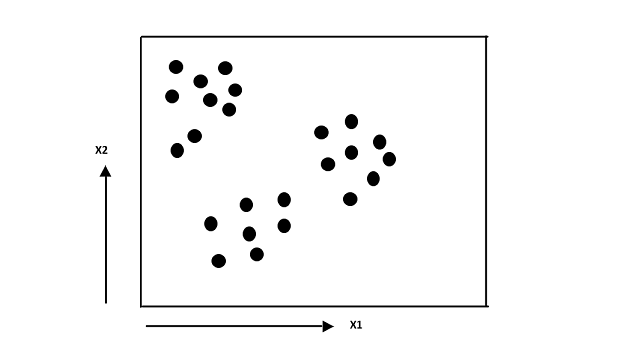

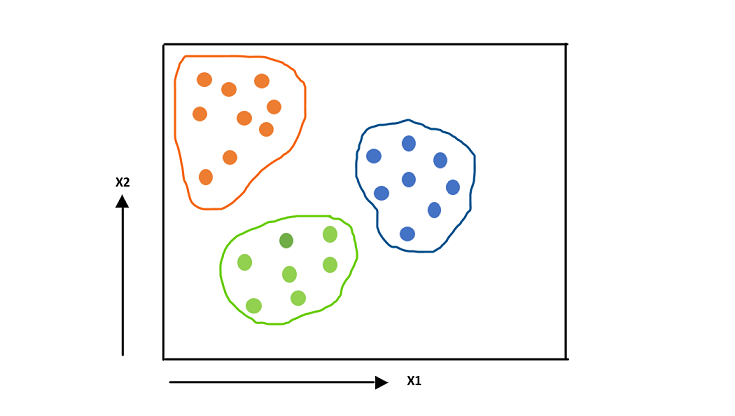

#Understanding Kmeans Clustering with Images

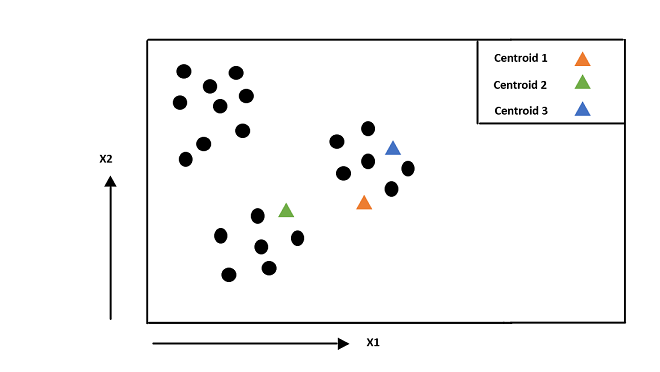

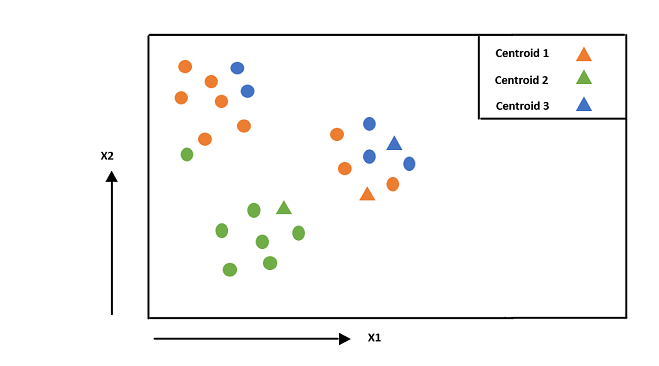

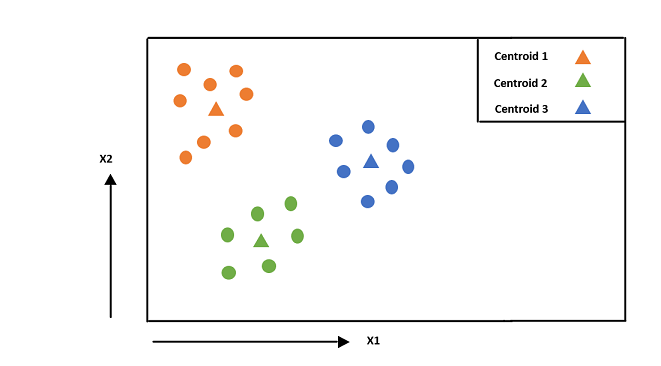

#Solving Kmeans Algorithm without Libraries

In [10]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd

In [12]:
dataset=pd.read_csv('Mall_Customers.csv')
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
X = dataset.iloc[:, [3, 4]].values
m=X.shape[0]
n=X.shape[1]
n_iter=100
K=5

1. Randomly intialize the cluster centers

In [13]:
Centroids=np.array([]).reshape(n,0) 
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids=np.c_[Centroids,X[rand]]
Output = {}

2. Calulate the Euclidean distance from each slected centroid

In [14]:
for i in range(n_iter):
      EuclidianDistance=np.array([]).reshape(m,0)
      for k in range(K):
          tempDist=np.sum((X-Centroids[:,k])**2,axis=1)
          EuclidianDistance=np.c_[EuclidianDistance,tempDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      for i in range(m):
          Y[C[i]]=np.c_[Y[C[i]],X[i]]
     
      for k in range(K):
          Y[k+1]=Y[k+1].T
    
      for k in range(K):
          Centroids[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y

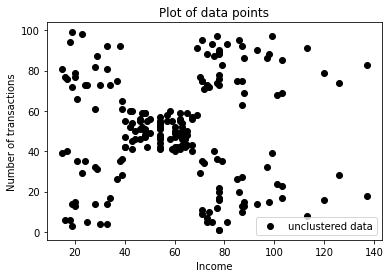

In [15]:
plt.scatter(X[:,0],X[:,1],c='black',label='unclustered data')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.title('Plot of data points')
plt.show()

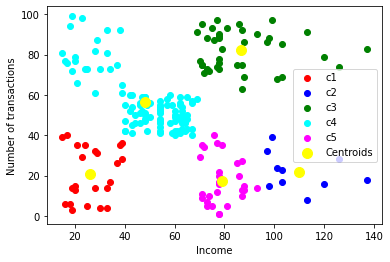

In [16]:
color=['red','blue','green','cyan','magenta']
labels=['c1','c2','c3','c4','c5']
for k in range(K):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],c=color[k],label=labels[k])
plt.scatter(Centroids[0,:],Centroids[1,:],s=100,c='yellow',label='Centroids')
plt.xlabel('Income')
plt.ylabel('Number of transactions')
plt.legend()
plt.show()

#How may of you think we have executed kmeans correctly ? Is something wrong in above approach ?

*Does selecting centroids randomly affect the number of iterations ?*

In [36]:
i=rd.randint(0,X.shape[0])
Centroid=np.array([X[i]])
K=5
for k in range(1,K):
    D=np.array([]) 
    for x in X:
        D=np.append(D,np.min(np.sum((x-Centroid)**2)))
    prob=D/np.sum(D)
    cummulative_prob=np.cumsum(prob)
    r=rd.random()
    i=0
    for j,p in enumerate(cummulative_prob):
        if r<p:
            i=j
            break
    Centroid=np.append(Centroid,[X[i]],axis=0)

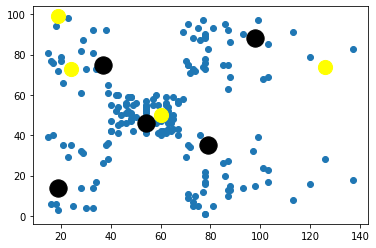

In [41]:
Centroids_rand=np.array([]).reshape(n,0) 
for i in range(K):
    rand=rd.randint(0,m-1)
    Centroids_rand=np.c_[Centroids_rand,X[rand]]
plt.scatter(X[:,0],X[:,1])
plt.scatter(Centroid[:,0],Centroid[:,1],s=200,color='yellow')
plt.scatter(Centroids_rand[0,:],Centroids_rand[1,:],s=300,color='black')

#Lets use the Library now

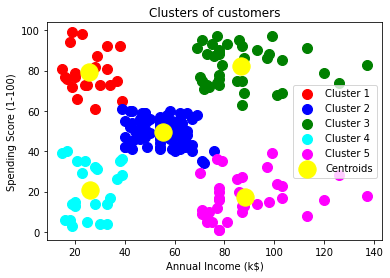

In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#Are we Still done with kmeans? I still feel something is not correct ?

Elbow Method

WCSS is the sum of squared distance between each point and the centroid in a cluster.

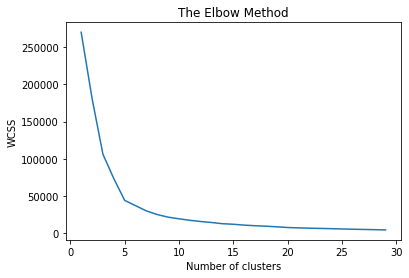

In [48]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 30):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 30), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#Hierarchical Clustering

Types
1.   Agglometric
2.   Divisive



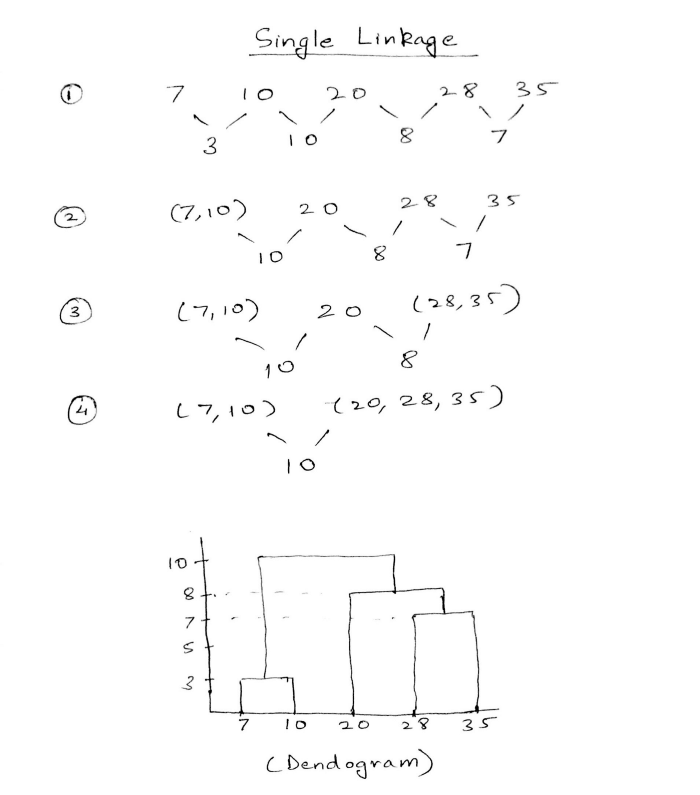

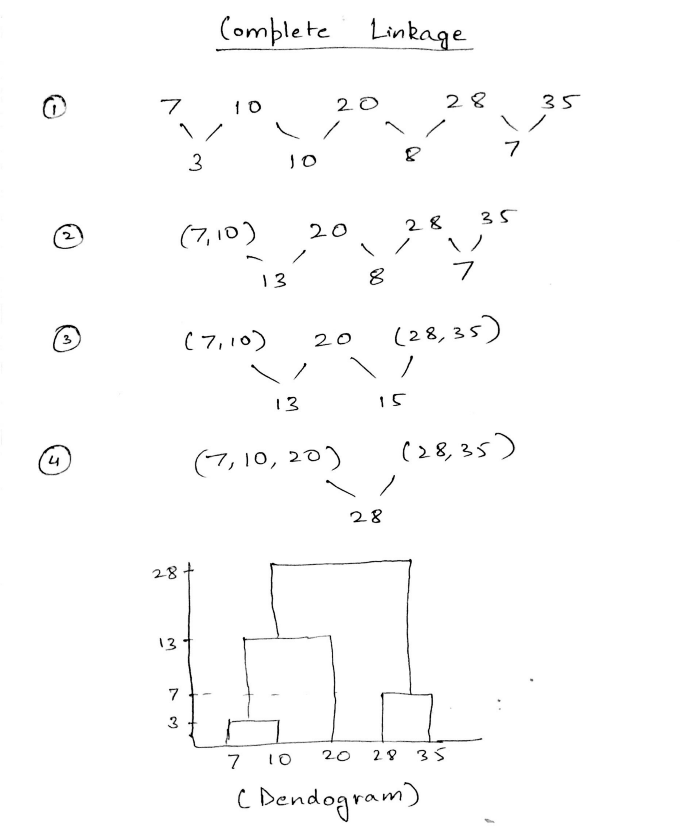

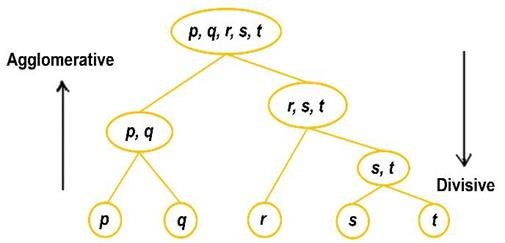

#Lets Impliment it

In [50]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  

In [51]:
dataset = pd.read_csv('Mall_Customers.csv') 
x = dataset.iloc[:, [3, 4]].values   

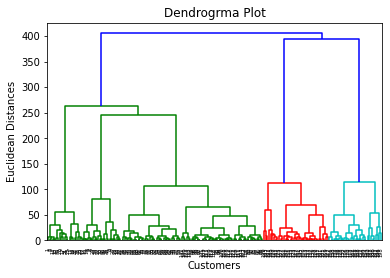

In [52]:
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
mtp.title("Dendrogrma Plot")  
mtp.ylabel("Euclidean Distances")  
mtp.xlabel("Customers")  
mtp.show()  

In [34]:
from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x)  

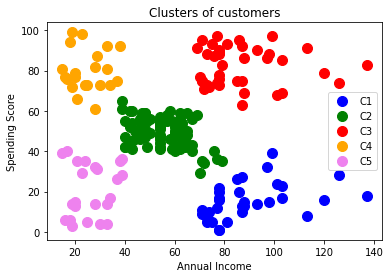

In [35]:
mtp.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'C1')  
mtp.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'C2')  
mtp.scatter(x[y_pred== 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'C3')  
mtp.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'orange', label = 'C4')  
mtp.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'violet', label = 'C5')  
mtp.title('Clusters of customers')  
mtp.xlabel('Annual Income')  
mtp.ylabel('Spending Score')  
mtp.legend()  
mtp.show()  